In [137]:
import os

In [138]:
os.getcwd()

'C:\\Users\\Admin\\Desktop\\Houses'

In [139]:
os.chdir('C:\\Users\\Admin\\Desktop\\Houses')

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
%matplotlib inline

In [141]:
train=pd.read_csv('train.csv',sep=',')

In [142]:
train.shape

(1460, 81)

In [143]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [144]:
train.set_index(train['Id'],inplace=True,drop=True)

In [145]:
train.drop(['Id'],axis=1,inplace=True)

In [146]:
#Description all variables
train.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [147]:
def miss_data(df):
    x = ['column_name','missing_data', 'missing_in_percentage','dup','dup_perc']
    missing_data = pd.DataFrame(columns=x)
    columns = df.columns
    for col in columns:
        icolumn_name = col
        imissing_data = df[col].isnull().sum()
        imissing_in_percentage = round((df[col].isnull().sum()/df[col].shape[0])*100,3)
        idup=df.duplicated(keep='first').astype(int).sum(axis=0)
        dup_per=round(100*(idup/df[col].shape[0]))
        missing_data.loc[len(missing_data)] = [icolumn_name, imissing_data, imissing_in_percentage,idup,dup_per]
        missing_data.sort_values(by=['missing_in_percentage'],ascending=False, inplace=True)
    print(missing_data)

In [148]:
miss_data(train)

    column_name missing_data  missing_in_percentage dup  dup_perc
71       PoolQC         1453                 99.521   0       0.0
73  MiscFeature         1406                 96.301   0       0.0
5         Alley         1369                 93.767   0       0.0
72        Fence         1179                 80.753   0       0.0
56  FireplaceQu          690                 47.260   0       0.0
..          ...          ...                    ...  ..       ...
20    RoofStyle            0                  0.000   0       0.0
39    HeatingQC            0                  0.000   0       0.0
75       MoSold            0                  0.000   0       0.0
77     SaleType            0                  0.000   0       0.0
79    SalePrice            0                  0.000   0       0.0

[80 rows x 5 columns]


In [149]:
#Have any NaN
train.columns[(train.isnull().sum()/train.shape[0])>0].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [150]:
#Have MORE than 75% NAN
train[train.columns[(train.isnull().sum()/train.shape[0])>0.75]]

,Alley,PoolQC,Fence,MiscFeature
Id,,,,
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
...,...,...,...,...
1456,NaN,NaN,NaN,NaN
1457,NaN,NaN,MnPrv,NaN
1458,NaN,NaN,GdPrv,Shed


In [151]:
#Deletion
list=train[train.columns[(train.isnull().sum()/train.shape[0])>0.75]].columns.tolist()
train.drop(columns=list,inplace=True)

In [152]:
#Do not have any NaN
train.columns[(train.isnull().sum()/train.shape[0])==0].tolist()

['MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'SalePrice']

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


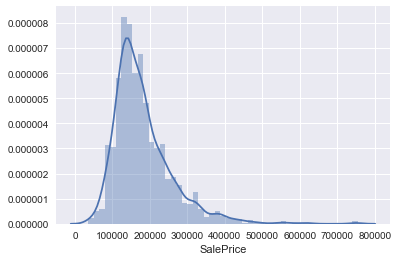

In [153]:
sns.distplot(train['SalePrice'])


In [154]:
round(train.SalePrice.mean())

180921

In [155]:
round(train.SalePrice.std())

79443

In [156]:
round(train.SalePrice.max())

755000

In [157]:
round(train.SalePrice.min())

34900

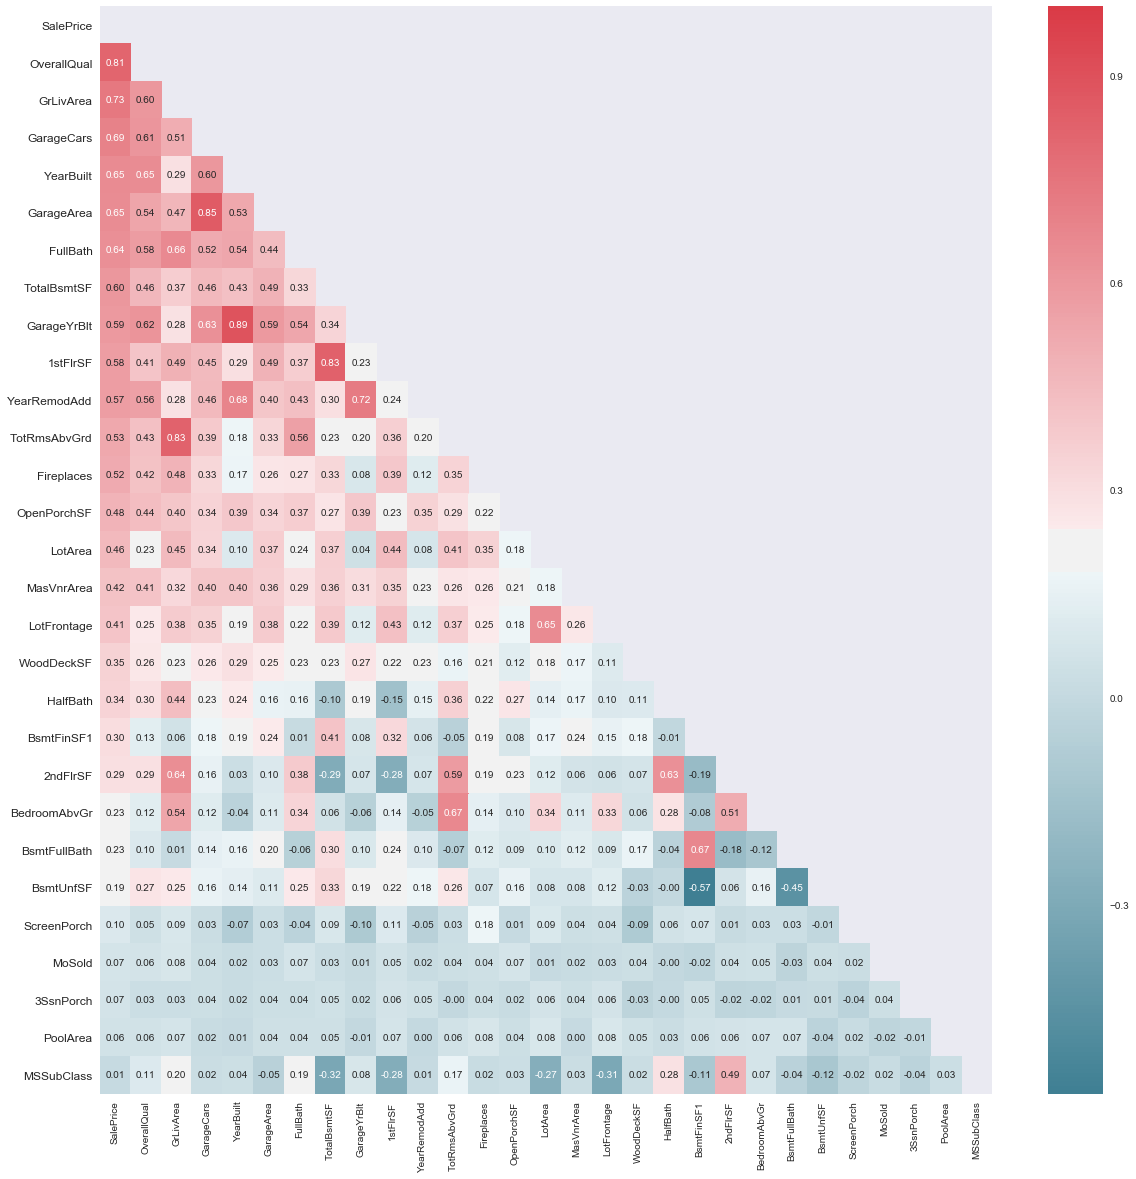

In [158]:
#CORRELATION ANALYSIS#
#CON ESTE CÓDIGO OBTENEMOS EL 100% DE LA MATRIZ DE CORRELACIONES, ORDENADA POR LA CORRELACIÓN CON VBLE PPAL.

#Filtramos aquellos registros que tengan SalePrice
corr = train[train.SalePrice>1].corr(method='spearman')

#Correlaciones mayores que un umbral .5 en este caso
top_corr_cols = corr[abs((corr.SalePrice)>=0)].SalePrice.sort_values(ascending=False).keys()

#Filtramos corr, que tiene toda la matriz de correlaciones, por aquellas que son mayores del umbral, 
#al hacerlo con loc no da nulls (bingo!)
top_corr = corr.loc[top_corr_cols, top_corr_cols]

#Creamos una matriz de ceros de las mismas dimensiones que la anterior y nos quedamos con el triángulo superior
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True

#Pintar
plt.figure(figsize=(20, 20))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12,rotation=0)
plt.show()
del corr, dropSelf, top_corr

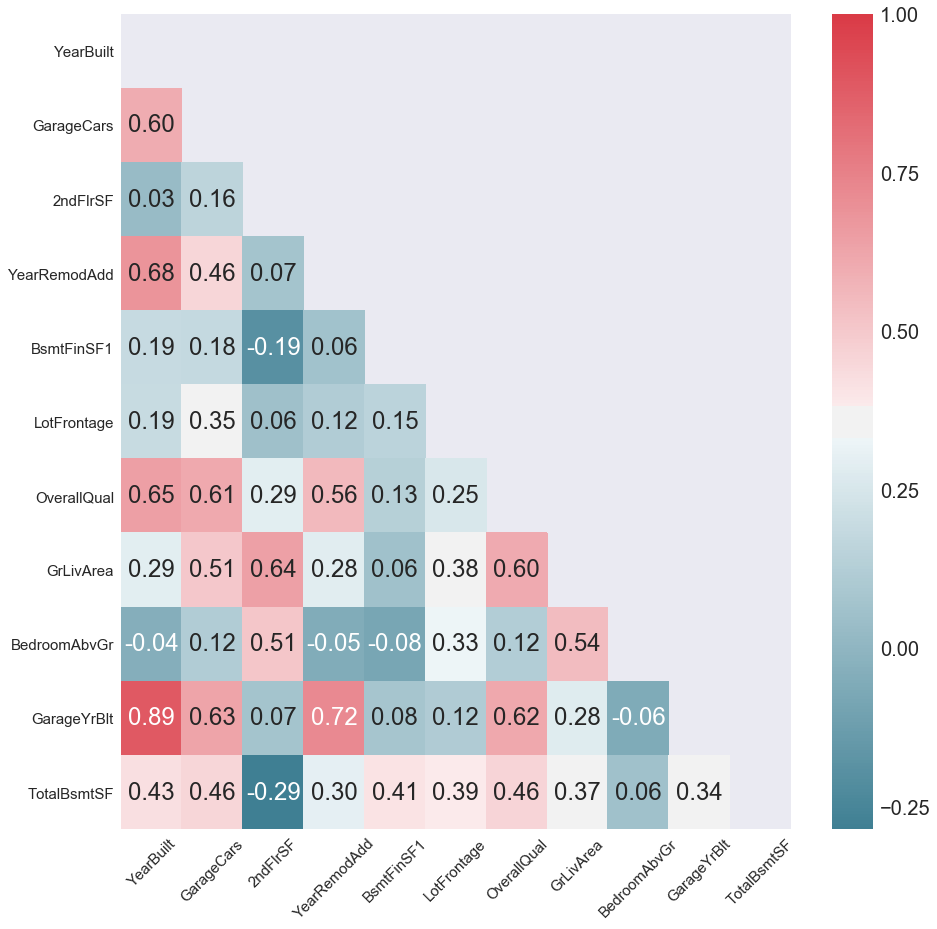

In [159]:
#CORRELATION ANALYSIS#
#HIGHLY CORRELATED FACTORS

#Filtramos aquellos registros que tengan SalePrice
corr = train[train.SalePrice>1].corr(method='spearman')
corr.drop(['SalePrice'],axis=1,inplace=True)
corr.drop(['SalePrice'],axis=0,inplace=True)
#Correlaciones mayores que un umbral .5 en este caso
matriz = corr[corr.isnull().any()==False]
#top_corr_cols = matriz[abs((matriz)>=0.5)]

listOfFeatures = [i for i in matriz]
setOfDroppedFeatures = set() 
for i in range(len(listOfFeatures)) :
    for j in range(i+1,len(listOfFeatures)): #Avoid repetitions 
        feature1=listOfFeatures[i]
        feature2=listOfFeatures[j]
        if abs(matriz[feature1][feature2])>0.60:
            setOfDroppedFeatures.add(feature1) #Add one of them to the set



#Filtramos corr, que tiene toda la matriz de correlaciones, por aquellas que son mayores del umbral, 
#al hacerlo con loc no da nulls (bingo!)
top_corr = corr.loc[setOfDroppedFeatures, setOfDroppedFeatures]

#Creamos una matriz de ceros de las mismas dimensiones que la anterior y nos quedamos con el triángulo superior
eliminamos = np.zeros_like(top_corr)
eliminamos[np.triu_indices_from(eliminamos)] = True

#Pintar
plt.figure(figsize=(15, 15))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=eliminamos)
sns.set(font_scale=1.5)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15,rotation=0)
plt.show()
del corr, eliminamos, top_corr


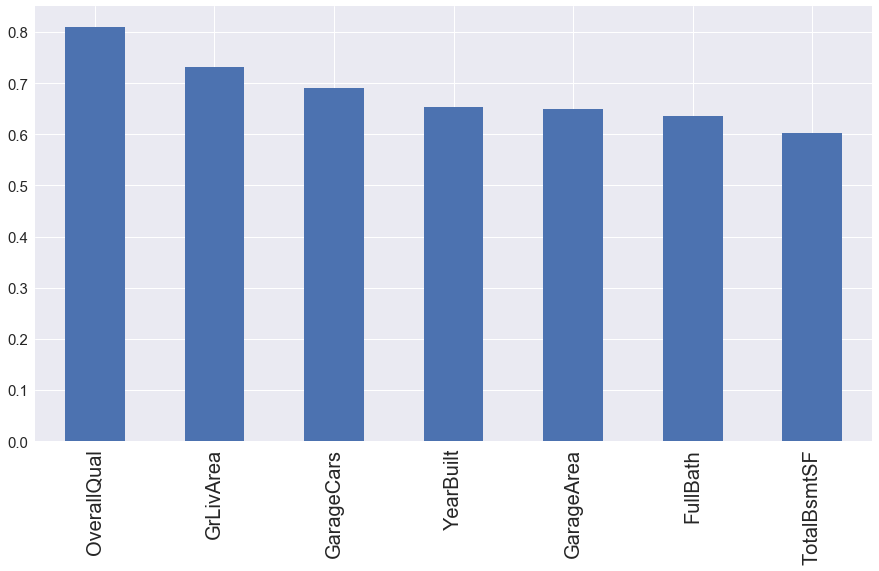

In [160]:
#ZOOM TO THE VARIABLES MOST CORRELATED WITH SALE PRICE
corr=abs(train.corr(method='spearman'))
correlaciones=corr[corr['SalePrice'].between(0.6,0.99)].SalePrice.sort_values(ascending=False)
plt.figure(figsize=(15,8))
plt.xticks(fontsize=20)
correlaciones.plot.bar()
plt.show();

In [161]:
train["Total_house_area"] = train["1stFlrSF"] + train["2ndFlrSF"] + train["TotalBsmtSF"]+train["GarageArea"]
train["Total_SF"]  = train["TotalBsmtSF"] + train["GrLivArea"]


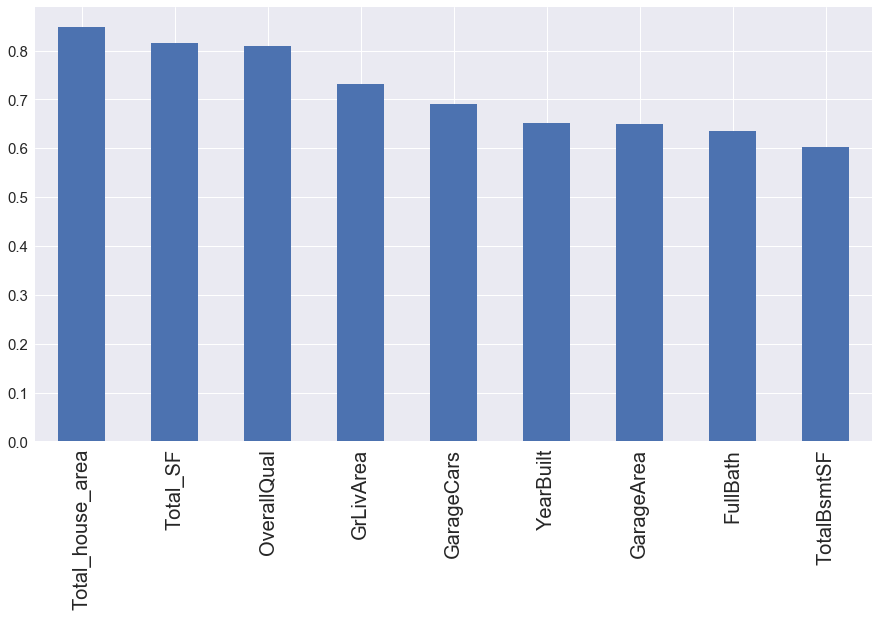

In [162]:
#ZOOM TO THE VARIABLES MOST CORRELATED WITH SALE PRICE
corr=abs(train.corr(method='spearman'))
correlaciones=corr[corr['SalePrice'].between(0.6,0.99)].SalePrice.sort_values(ascending=False)
plt.figure(figsize=(15,8))
plt.xticks(fontsize=20)
correlaciones.plot.bar()
plt.show();

In [163]:
train.drop(['Total_SF','GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','2ndFlrSF'],axis=1,inplace=True)


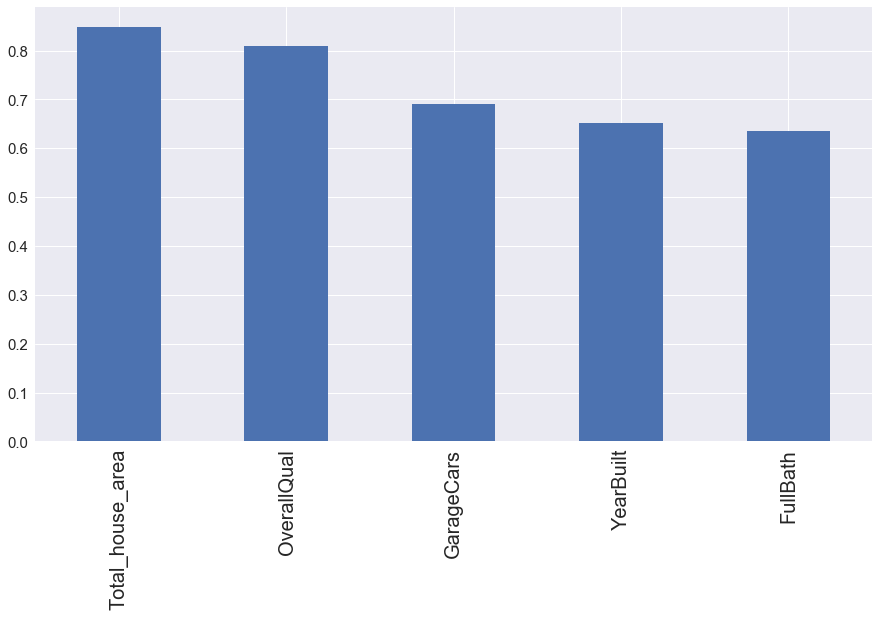

In [164]:
#ZOOM TO THE VARIABLES MOST CORRELATED WITH SALE PRICE
corr=abs(train.corr(method='spearman'))
correlaciones=corr[corr['SalePrice'].between(0.6,0.99)].SalePrice.sort_values(ascending=False)
plt.figure(figsize=(15,8))
plt.xticks(fontsize=20)
correlaciones.plot.bar()
plt.show();

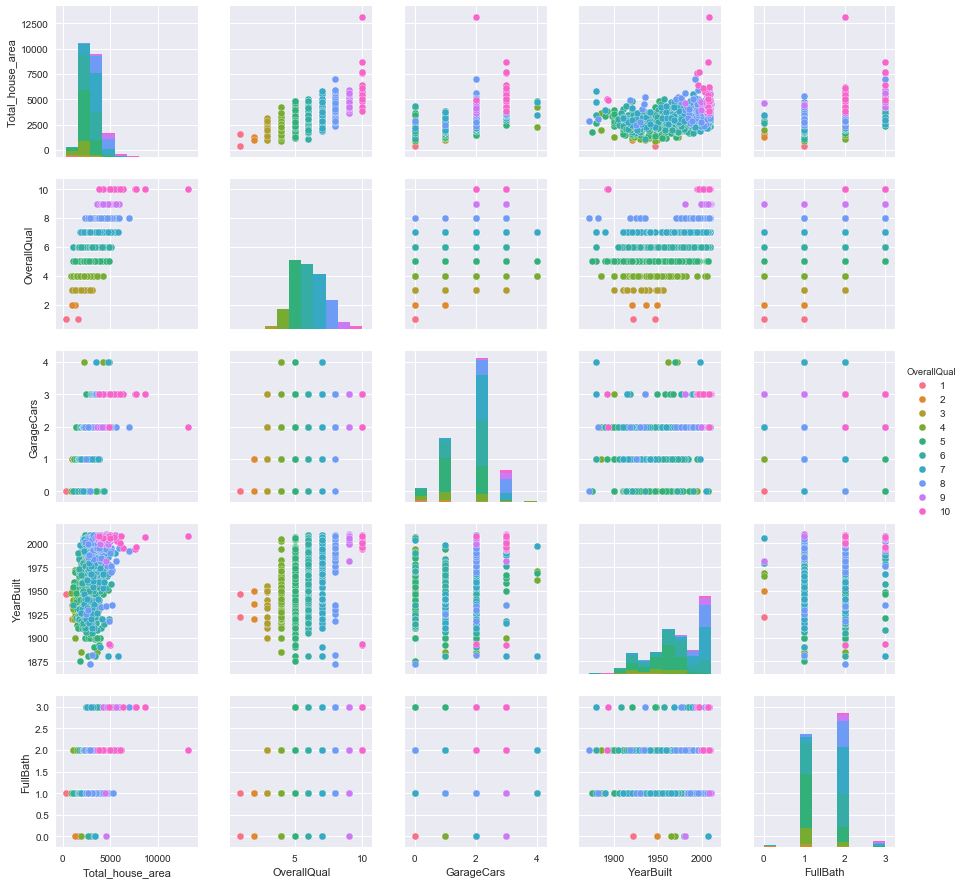

<Figure size 1440x1440 with 0 Axes>

In [165]:
#scatterplot
sns.set()
cols = correlaciones.index.tolist()
sns.pairplot(train[cols],hue='OverallQual')
plt.figure(figsize=(20, 20))
plt.show()

In [166]:
#X and y
train.dropna(subset=(['SalePrice']),inplace=True)
y=train['SalePrice']             
X=train.drop(columns='SalePrice')

In [167]:
X.columns.tolist()

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 '

In [168]:
zmean=X.select_dtypes(include=['float64','int64']).apply(lambda x: x.fillna(x.mean()),axis=0)
zmean.select_dtypes(include=['float64','int64']).head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Total_house_area
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,3114
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,2984
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,3314
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,3115
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,4179


In [169]:
fill_mode = lambda col: col.fillna(col.mode())
an=X.select_dtypes(include='object').apply(fill_mode, axis=0)
an.select_dtypes(include='object').head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [170]:
#Dummy the categorical
def total(an,num):    
    dummies=pd.get_dummies(an)
    X=pd.concat([num,dummies],axis=1)
    return X
  

In [171]:
X=total(an,zmean)
miss_data(X)

               column_name missing_data  missing_in_percentage dup  dup_perc
0               MSSubClass            0                    0.0   0       0.0
8               BsmtFinSF1            0                    0.0   0       0.0
34             MSZoning_RH            0                    0.0   0       0.0
95         Condition2_PosN            0                    0.0   0       0.0
19              Fireplaces            0                    0.0   0       0.0
..                     ...          ...                    ...  ..       ...
254           PavedDrive_P            0                    0.0   0       0.0
260         SaleType_ConLI            0                    0.0   0       0.0
262           SaleType_New            0                    0.0   0       0.0
268   SaleCondition_Family            0                    0.0   0       0.0
270  SaleCondition_Partial            0                    0.0   0       0.0

[271 rows x 5 columns]


In [172]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model,X,y):
    scores = cross_val_score(model,
                             X,
                             y,
                             cv=5,
                             scoring='r2')
    
    return np.mean(scores)
    #print('STD: ', np.std(scores))
    #print('\n')

In [173]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result
    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.figure(figsize=(20,12))
        plt.xticks(fontsize=10)
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=3,fancybox=True, framealpha=1, shadow=True, borderpad=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

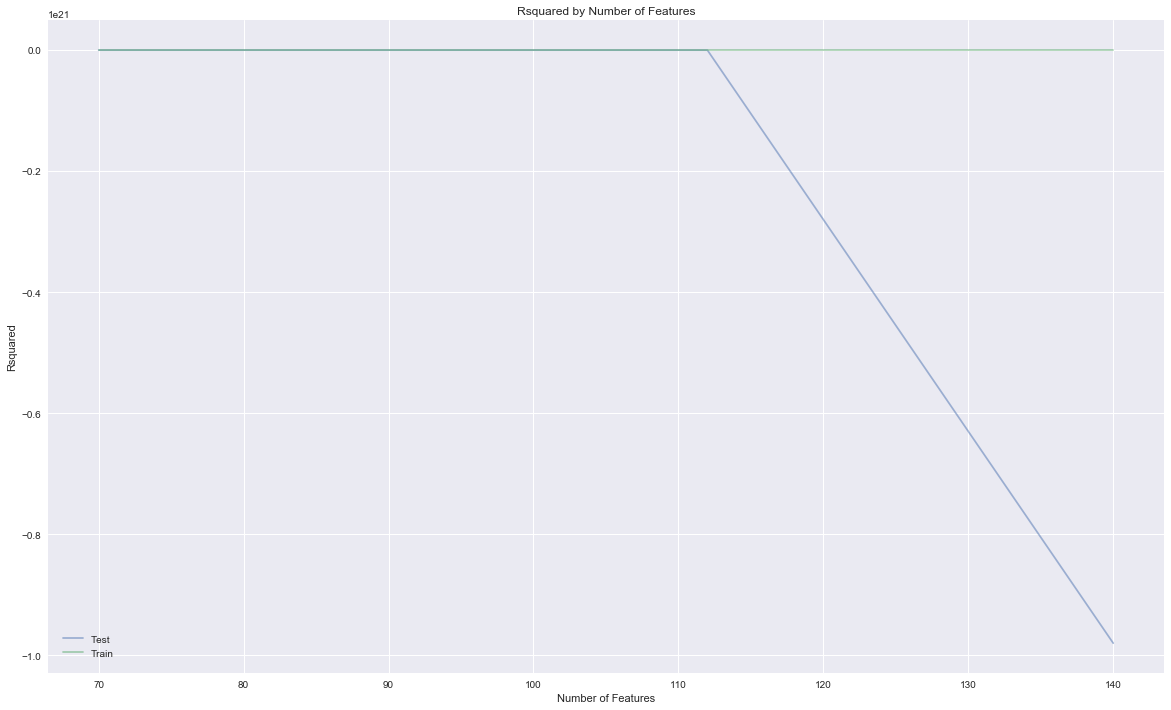

In [174]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [500,250,100,50]

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [175]:
# Cell for your computations to answer the next question
print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2


112
0.847211702328229
0.860292804109146


In [335]:
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet,ElasticNetCV
# Train model with default alpha=1 and l1_ratio=0.5
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5,normalize=True).fit(X_train, y_train)


alpha = [0.5, 1, 10,20,30,40,50,60,70,80,90, 100, 1000]
l1_ratio = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
grid_ENet = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2',cv=10)
grid_ENet_result = grid_ENet.fit(X_train, y_train)
print('Best Score_ENet: ', grid_ENet_result.best_score_)
print('Best Params_ENet: ', grid_ENet_result.best_params_)

lasso_params={'alpha' : [0.5, 1, 10,20,30,40,50,60,70,80,90, 100, 1000]}
grid_lasso = GridSearchCV(estimator=Lasso(normalize=True), param_grid=lasso_params, scoring='r2',cv=10)
grid_lasso_result = grid_lasso.fit(X_train, y_train)
print('Best Score_Lasso: ', grid_lasso_result.best_score_)
print('Best Params_Lasso: ', grid_lasso_result.best_params_)

ridge_params = {'alpha':[0.1,0.5,1,3,5,10,15,20,25,50,75,100,125,150,200, 230, 250,265, 270, 275, 290, 300, 500]}
grid_ridge = GridSearchCV(estimator=Ridge(normalize=True), param_grid=ridge_params, scoring='r2',cv=10)
grid_ridge_result = grid_ridge.fit(X_train, y_train)
print('Best Score_Ridge: ', grid_ridge_result.best_score_)
print('Best Params_Ridge: ', grid_ridge_result.best_params_)


Best Score_ENet:  0.7892608943865338
Best Params_ENet:  {'alpha': 30, 'l1_ratio': 1}
Best Score_Lasso:  0.7892608943865338
Best Params_Lasso:  {'alpha': 30}
Best Score_Ridge:  0.7929946993248368
Best Params_Ridge:  {'alpha': 0.5}


In [336]:
def model_eval(model):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)    
    #print('Train r2 score: ',get_cv_scores(model,X_train,y_train))
    #print('Test r2 score: ', get_cv_scores(model,X_test,y_test))
    print('Train r2 score: ', r2_score(y_train_pred, y_train))
    print('Test r2 score: ', r2_score(y_test, y_pred))
    train_mse = mean_squared_error(y_train_pred, y_train)
    test_mse = mean_squared_error(y_pred, y_test)
    train_mse = mean_squared_error(y_train_pred, y_train)
    test_mse = mean_squared_error(y_pred, y_test)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    print('Train RMSE: %.4f' % train_rmse)
    print('Test RMSE: %.4f' % test_rmse)

In [337]:
model_eval(grid_ENet_result.best_estimator_)

Train r2 score:  0.7991135687016402
Test r2 score:  0.8485033476562885
Train RMSE: 30929.8452
Test RMSE: 32513.9638


In [338]:
model_eval(lm_model)

Train r2 score:  0.837605062807047
Test r2 score:  0.847211702328229
Train RMSE: 28997.2120
Test RMSE: 32652.2751


In [339]:
model_eval(grid_ridge_result.best_estimator_)

Train r2 score:  0.7624101256293463
Test r2 score:  0.832138332660794
Train RMSE: 31991.5010
Test RMSE: 34225.0559


In [340]:
model_eval(grid_lasso_result.best_estimator_)

Train r2 score:  0.7991135687016402
Test r2 score:  0.8485033476562885
Train RMSE: 30929.8452
Test RMSE: 32513.9638


112 features, reduction of 0.00%


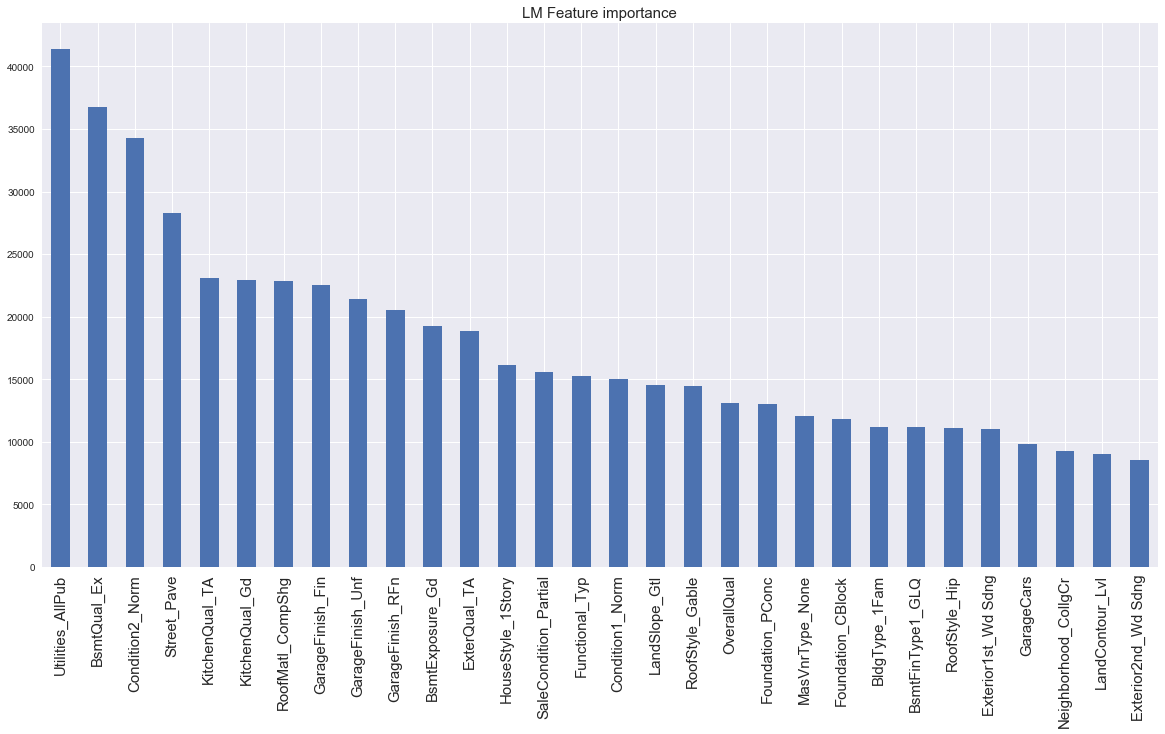

In [341]:
#LM Feature importance
feature_importance = pd.Series(index = X_train.columns, data = np.abs(lm_model.coef_))
n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))
feature_importance.sort_values(ascending=False).head(30).plot(kind = 'bar', figsize = (20,10))
plt.xticks(fontsize=15)
plt.title('LM Feature importance',fontsize=15);

55 features, reduction of 50.89%


BsmtQual_Ex              39031.604445
Condition2_Norm          22312.629134
Utilities_AllPub         18399.243998
OverallQual              14205.802337
BsmtExposure_Gd          11741.429066
KitchenQual_TA           11730.519195
Condition1_Norm          11479.720830
LandSlope_Gtl            10960.858672
GarageCars               10080.826663
ExterQual_TA              9119.537465
KitchenQual_Gd            8412.466330
SaleCondition_Partial     8158.302201
BldgType_1Fam             8015.474498
KitchenAbvGr              7581.327886
FullBath                  7568.084394
Functional_Typ            6984.366506
BsmtFinType1_GLQ          6921.852891
RoofMatl_CompShg          6871.491128
Fireplaces                6674.910730
MSZoning_RM               5798.146617
HalfBath                  5604.631280
BsmtFullBath              5172.923097
BsmtFinType1_Unf          5115.582535
TotRmsAbvGrd              5063.061765
Street_Pave               5020.622797
BsmtExposure_No           4923.259987
Foundation_B

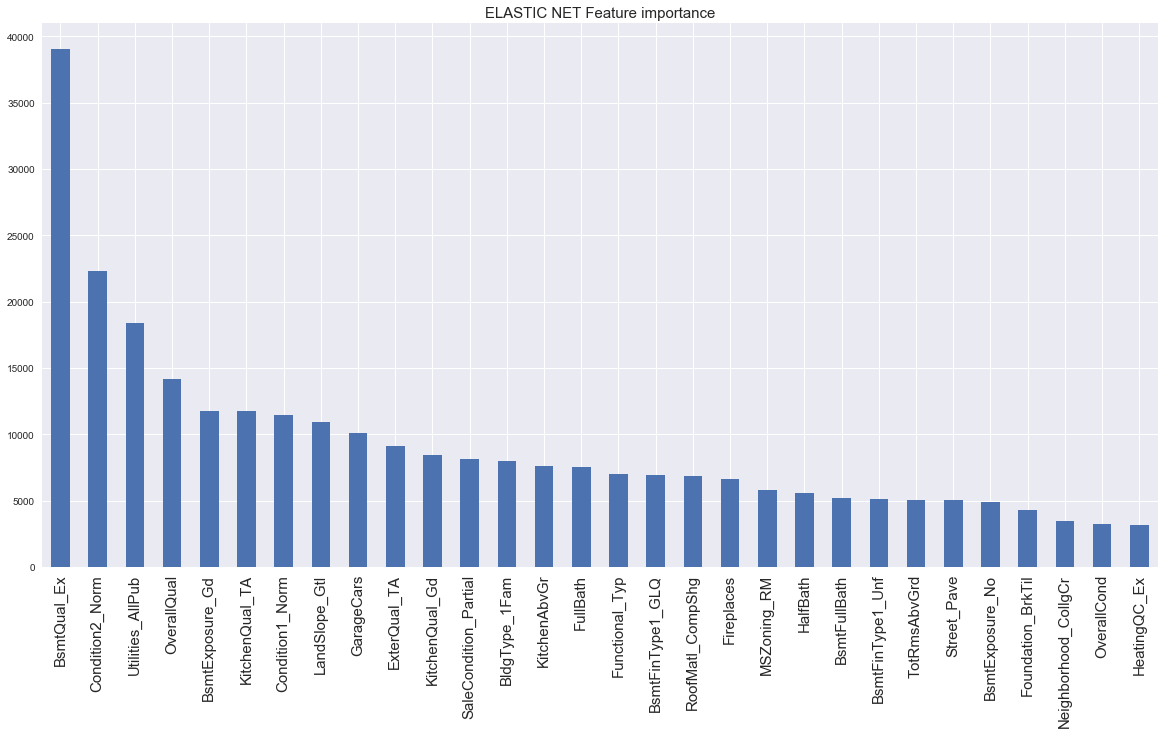

In [467]:
#ELASTIC NET Feature importance
feature_importance = pd.Series(index = X_train.columns, data = np.abs(grid_ENet_result.best_estimator_.coef_))
n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))
feature_importance.sort_values(ascending=False).head(30).plot(kind = 'bar', figsize = (20,10))
plt.xticks(fontsize=15)
plt.title('ELASTIC NET Feature importance',fontsize=15);
feature_importance.sort_values(ascending=False).head(30)

112 features, reduction of 0.00%


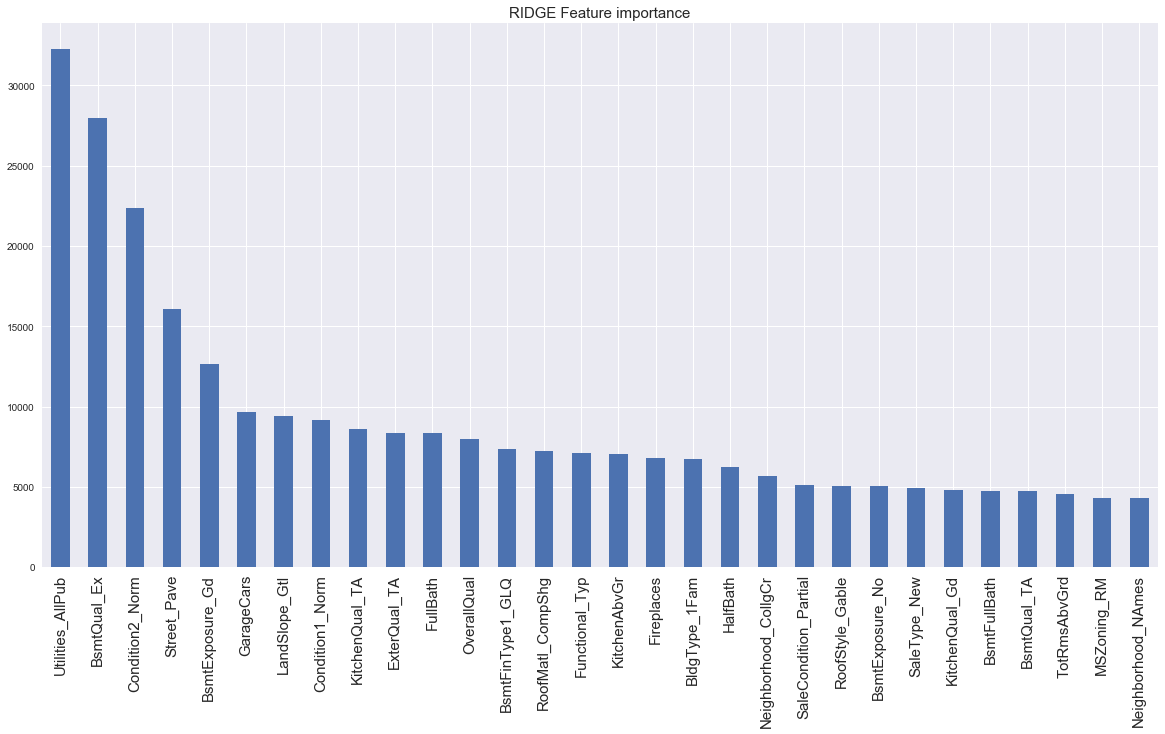

In [343]:
#RIDGE Feature importance
feature_importance = pd.Series(index = X_train.columns, data = np.abs(grid_ridge_result.best_estimator_.coef_))
n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))
feature_importance.sort_values(ascending=False).head(30).plot(kind = 'bar', figsize = (20,10))
plt.xticks(fontsize=15)
plt.title('RIDGE Feature importance',fontsize=15);

55 features, reduction of 50.89%


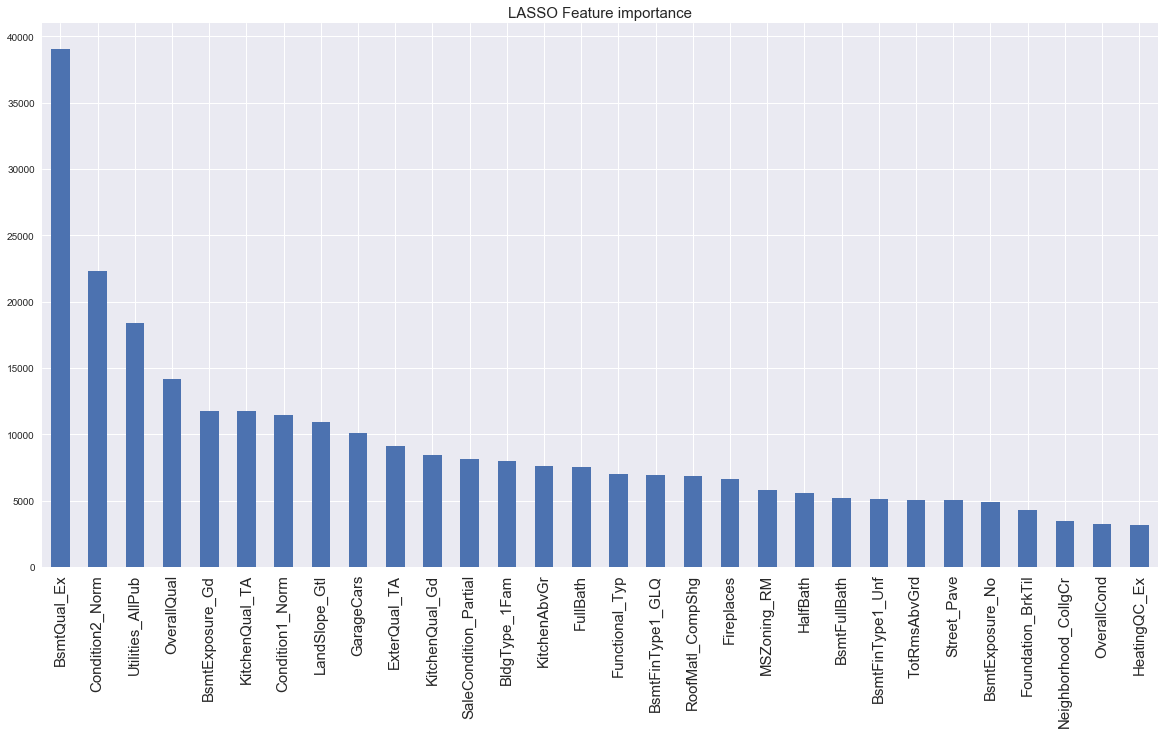

In [344]:
#LASSO Feature importance
feature_importance = pd.Series(index = X_train.columns, data = np.abs(grid_lasso_result.best_estimator_.coef_))
n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))
feature_importance.sort_values(ascending=False).head(30).plot(kind = 'bar', figsize = (20,10))
plt.xticks(fontsize=15)
plt.title('LASSO Feature importance',fontsize=15);

In [345]:
def valuator(model):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    return y_pred

In [346]:
pred_SalePrice=valuator(grid_ENet_result.best_estimator_)

In [347]:
sp=pd.DataFrame(pred_SalePrice,columns=['Pred_SalePrice'],index=X_test.index)


In [348]:
y_t=pd.DataFrame(y_test,columns=['SalePrice'])

In [349]:
X_test_pred=pd.concat([X_test,sp,y_t],axis=1)

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[]

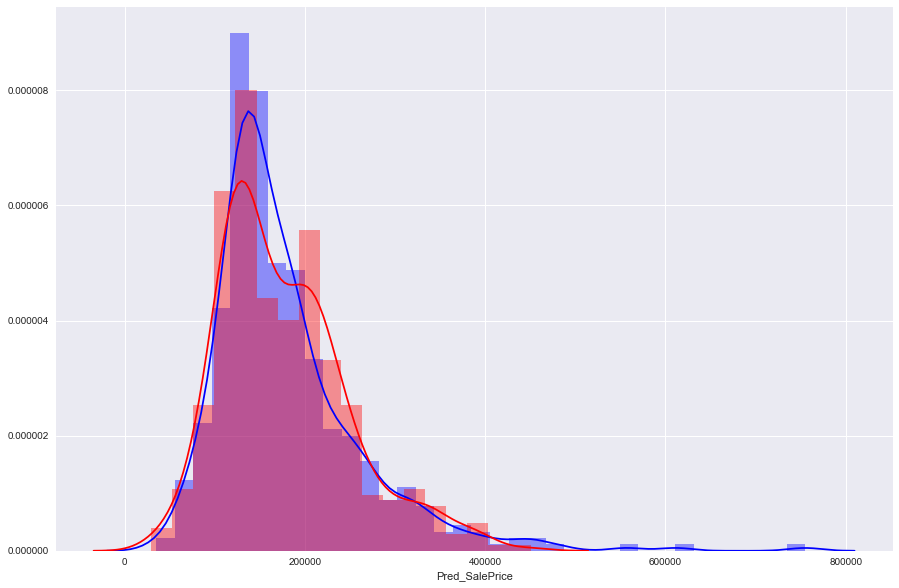

In [350]:
plt.figure(figsize=(15,10))
sns.distplot(X_test_pred.SalePrice,color='b')
sns.distplot(X_test_pred.Pred_SalePrice,color='r')
plt.plot()

In [418]:
Residuals=X_test_pred.Pred_SalePrice-X_test_pred.SalePrice

Text(0.5,1,'Residual plot')

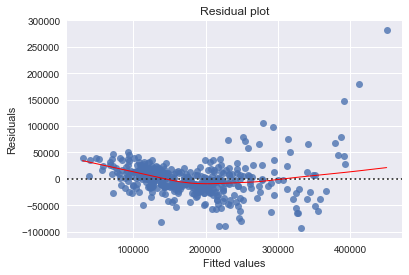

In [419]:
sns.residplot(X_test_pred.Pred_SalePrice, X_test_pred.SalePrice,lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title('Residual plot')


 mu = -2731.76 and sigma = 32399.00



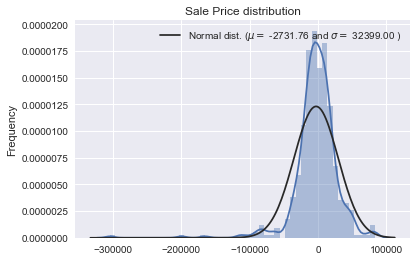

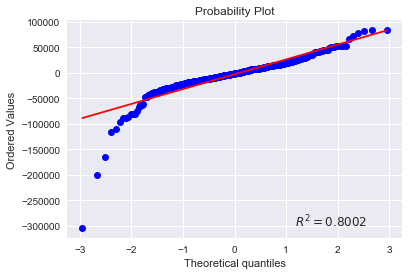

In [420]:
sns.distplot(Residuals , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Residuals)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Sale Price distribution')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(Residuals, plot=plt,rvalue=True)
plt.show();

Text(0.5,0,'Fitted value')

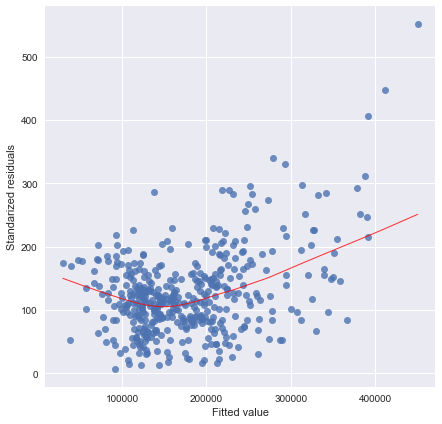

In [421]:
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(Residuals))

plt.figure(figsize=(7,7))
sns.regplot(X_test_pred.Pred_SalePrice, model_norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")

In [451]:
X_test_pred_ac=X_test_pred[X_test_pred.SalePrice<400000]

In [452]:
X_test_pred_ac['Residuals_ac']=X_test_pred_ac.Pred_SalePrice-X_test_pred_ac.SalePrice

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.



 mu = 249.70 and sigma = 24188.13



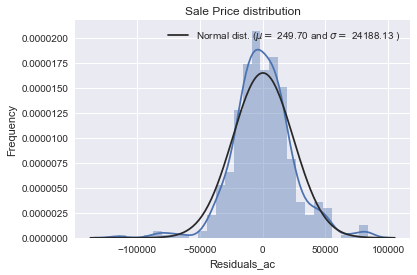

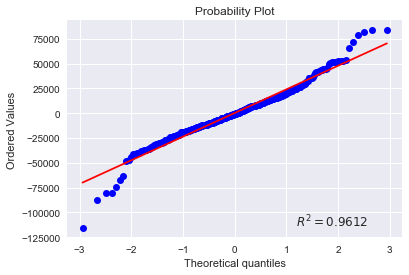

In [453]:
sns.distplot(X_test_pred_ac.Residuals_ac , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(X_test_pred_ac.Residuals_ac)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Sale Price distribution')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(X_test_pred_ac.Residuals_ac, plot=plt,rvalue=True)
plt.show();

[]

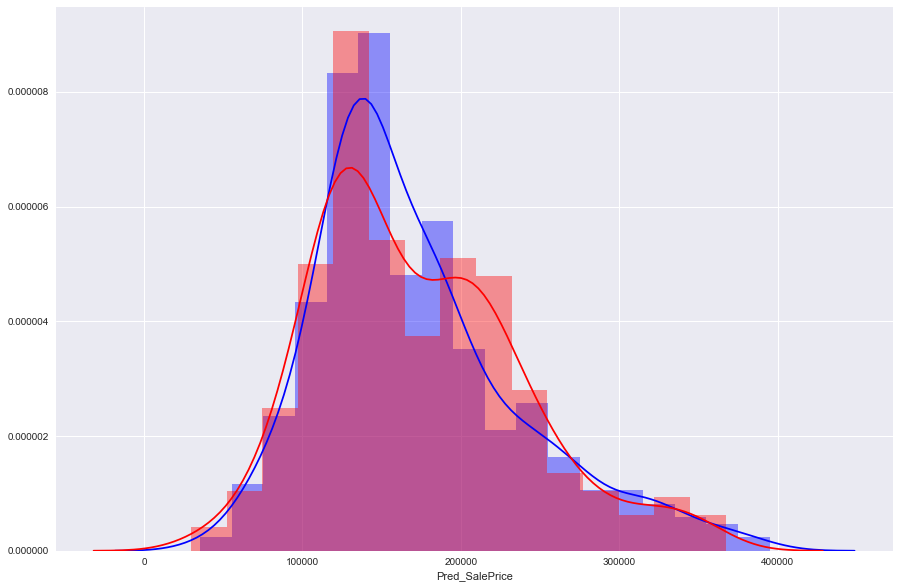

In [454]:
plt.figure(figsize=(15,10))
sns.distplot(X_test_pred_ac.SalePrice,color='b')
sns.distplot(X_test_pred_ac.Pred_SalePrice,color='r')
plt.plot()

In [455]:
X_test_pred_ac.Residuals_ac.mean()

249.70376804702335

In [456]:
X_test_pred_ac.Residuals_ac.std()

24216.506040755314

In [457]:
X_test_pred_ac.loc[X_test_pred_ac.Residuals_ac>X_test_pred_ac.Residuals_ac.quantile(0.90),'Score']='Green'

In [458]:
X_test_pred_ac.loc[X_test_pred_ac.Residuals_ac<X_test_pred_ac.Residuals_ac.quantile(0.10),'Score']='Red'

In [459]:
X_test_pred_ac.Score.fillna('Ambar',inplace=True)

In [460]:
X_test_pred_ac.Score.value_counts

<bound method IndexOpsMixin.value_counts of Id
893     Ambar
1106    Ambar
414     Ambar
523     Ambar
1037    Ambar
        ...  
846     Ambar
332     Ambar
324     Ambar
651     Ambar
440     Green
Name: Score, Length: 427, dtype: object>

In [475]:
X_test_pred_ac.groupby(['Score'])['Total_house_area','OverallQual','SalePrice','GarageCars','FullBath','BsmtQual_Ex','Condition2_Norm','Condition1_Norm'].mean()

,Total_house_area,OverallQual,SalePrice,GarageCars,FullBath,BsmtQual_Ex,Condition2_Norm,Condition1_Norm
Score,,,,,,,,
Ambar,2858.017595,5.873900,166671.351906,1.659824,1.480938,0.041056,0.997067,0.865103
Green,3245.255814,6.604651,170116.744186,2.093023,1.674419,0.255814,1.000000,0.976744
Red,3186.232558,5.930233,215237.069767,1.581395,1.534884,0.023256,0.883721,0.813953


In [ ]:
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale